In [13]:
%matplotlib inline
from random import normalvariate

In [14]:
num_iterations = 10000

In [15]:
from math import sin
def generator(t) -> int:
    return sin(t) 

In [16]:
X = [0]
for t in range (1, num_iterations):
    X.append(generator(t / 100.0))

In [17]:
import csv
from datetime import datetime
filename=f'../datasets/sinwave_{datetime.utcnow()}.csv'
with open(filename, 'w', newline='') as csvfile:
    ds_writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    ds_writer.writerow(X)
filename

'../datasets/sinwave_2019-09-14 01:50:46.621030.csv'

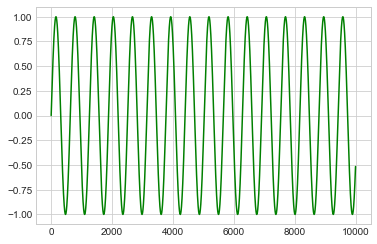

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(X, color = "green")
plt.show()

In [19]:
import numpy as np
ts = np.array(X)

In [20]:
ts.mean()

0.0014021180857322292

In [21]:
ts.std()

0.7086384016016377

In [22]:
from math import ceil, floor
def DDF(series):
    return np.histogram(series, bins=int(ceil(max(series))-floor(min(series))), density=True)    

def E(series):
    x, p = DDF(series)
    return sum([x[i] * p[i] for i in range(len(x))])

def Var(series): 
    p, x = DDF(series)
    u = E(series)
    return sum([p[i] * ((x[i] - u)**2) for i in range(len(p))])

In [23]:
mu = E(X)
sigma = Var(X)
print (f"mu = {mu} sigma={sigma}")

mu = -0.4972999950027079 sigma=0.24999270769664772


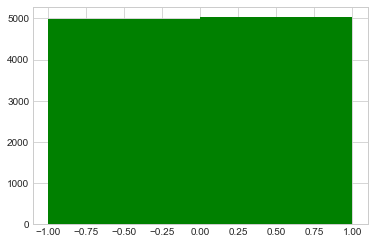

In [24]:
count, bins, ignored  = plt.hist(X, int(ceil(max(ts))-floor(min(ts))), color='green')